In [2]:
import os
import csv
import numpy as np

In [3]:
def euclideanDistance(val_data,train_data,val_dot,train_dot):
    D=0
    for col in range(train_data.shape[1]):
        D+=(val_data[val_dot,col]-train_data[train_dot,col])**2
    return D**0.5

In [4]:
def predict(k,distance,train_data_label):
    dict_of_distance=dict(zip(distance,train_data_label))#字典
    order=sorted(dict_of_distance.items(),key=lambda x:x[0])#排序
    #前k小的距离
    temp=[]
    for i in range(k):
        temp.append(order[i][1])
    vote=[0,0,0]#不同标签的数目
    for i in range(k):
        vote[temp[i]]+=1
    result=vote.index(max(vote))#选择数目较多的类别作为最终类别
    return result

In [5]:
def findk(train_data,train_data_label,val_data,val_label):
    train_data_len = train_data.shape[0]
    val_data_len = val_data.shape[0]
    result_k=[]#存放不同k值下的正确率
    range_k=35
    for k in range(1,range_k):
        counter_correct=0#分类正确的数目
        for j in range(val_data_len):#在验证集中验证
            label=val_label[j]
            distance=[]#训练集中所有点到验证集第j个点的距离
            for i in range(train_data_len):
                distance.append(euclideanDistance(val_data,train_data,j,i))#欧氏距离
            result=predict(k,distance,train_data_label)    #预测类别
            if label==result:
                counter_correct+=1
        result_k.append(counter_correct/val_data_len)#计算k的正确率
    plt.plot(list(range(1,range_k)),result_k)
    plt.show()#绘制不同的k对应的正确率

    return result_k

In [6]:
with open('data/wine.data') as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
print(data[56:62]+data[130:133]) # 打印部分数据


X = np.array([[float(x) for x in s[1:]] for s in data[:178]], np.float32)
Y = np.array([s[0] for s in data[:178]], np.int32)-1 #把y值都-1 为0 1 2 三类

[['1', '14.22', '1.7', '2.3', '16.3', '118', '3.2', '3', '.26', '2.03', '6.38', '.94', '3.31', '970'], ['1', '13.29', '1.97', '2.68', '16.8', '102', '3', '3.23', '.31', '1.66', '6', '1.07', '2.84', '1270'], ['1', '13.72', '1.43', '2.5', '16.7', '108', '3.4', '3.67', '.19', '2.04', '6.8', '.89', '2.87', '1285'], ['2', '12.37', '.94', '1.36', '10.6', '88', '1.98', '.57', '.28', '.42', '1.95', '1.05', '1.82', '520'], ['2', '12.33', '1.1', '2.28', '16', '101', '2.05', '1.09', '.63', '.41', '3.27', '1.25', '1.67', '680'], ['2', '12.64', '1.36', '2.02', '16.8', '100', '2.02', '1.41', '.53', '.62', '5.75', '.98', '1.59', '450'], ['3', '12.86', '1.35', '2.32', '18', '122', '1.51', '1.25', '.21', '.94', '4.1', '.76', '1.29', '630'], ['3', '12.88', '2.99', '2.4', '20', '104', '1.3', '1.22', '.24', '.83', '5.4', '.74', '1.42', '530'], ['3', '12.81', '2.31', '2.4', '24', '98', '1.15', '1.09', '.27', '.83', '5.7', '.66', '1.36', '560']]


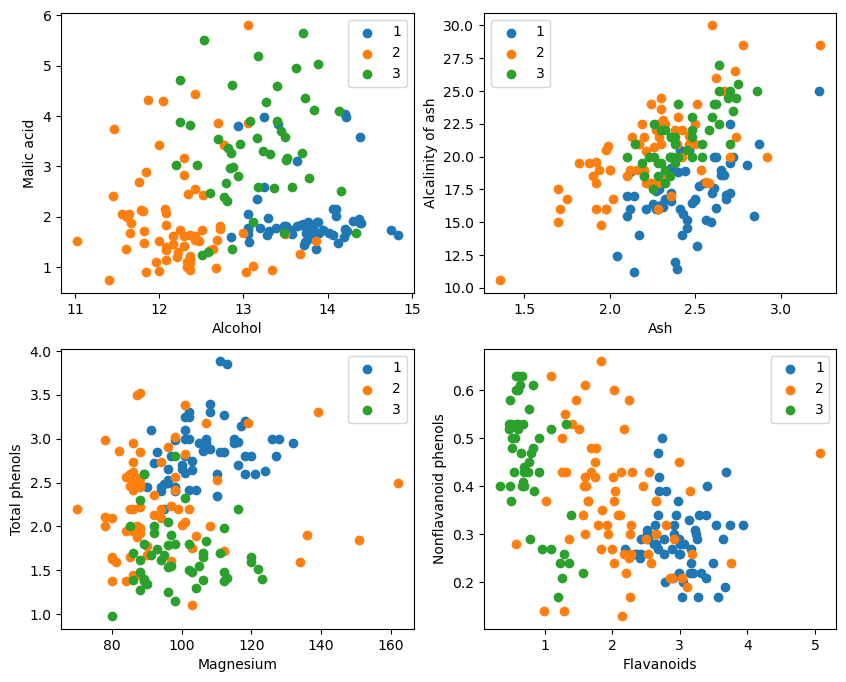

In [7]:
from matplotlib import pyplot as plt
# %matplotlib inline
attrs = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
         'OD280/OD315 of diluted wines', 'Proline']
plt.figure(figsize=(10, 8))
for i in range(0, 4):
    plt.subplot(2, 2, i+1)
    a1, a2 = 2 * i, 2 * i + 1
    plt.scatter(X[:59, a1], X[:59, a2], label='1')
    plt.scatter(X[59:130, a1], X[59:130, a2], label='2')
    plt.scatter(X[130:, a1], X[130:, a2], label='3')
    plt.xlabel(attrs[a1])
    plt.ylabel(attrs[a2])
    plt.legend()
plt.show()

In [8]:
train_idx = np.random.choice(178, 128, replace=False)
test_idx = np.array(list(set(range(178)) - set(train_idx)))
X_train, Y_train = X[train_idx], Y[train_idx]
X_test, Y_test = X[test_idx], Y[test_idx]

Length_train_data = X_train.shape[0]
Length_test_data = X_test.shape[0]

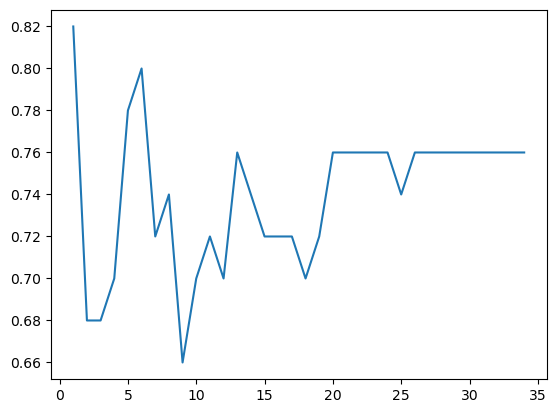

In [9]:
crossValTimes = 1
result = []
#np.random.seed(5)
for time in range(crossValTimes):
    t_train_idx = np.random.randint(0, 178, 128)
    #t_train_idx = np.random.choice(178, 128, replace=False)
    t_test_idx = np.array(list(set(range(178)) - set(train_idx)))
    t_X_train, t_Y_train = X[train_idx], Y[train_idx]
    t_X_test, t_Y_test = X[test_idx], Y[test_idx]
    result.append( findk(t_X_train,t_Y_train,t_X_test,t_Y_test))

In [10]:
mean = np.mean(result,axis = 0)

best_k = np.argmax(mean)+1
print(best_k)

1


In [11]:
best_k = np.argmax(mean)+1
print(best_k)
result_test1 = []
for j in range(0, Length_test_data):
    distance_test = []
    for i in range(Length_train_data):  # 求解距离训练集中其他点的距离
        distance_test.append(euclideanDistance(X_test, X_train, j, i))
    a = predict(best_k, distance_test, Y_train)
    result_test1.append(a)

correct = [result_test1==Y_test]
print("accuracy:",np.mean(correct))

1
accuracy: 0.82
